In [40]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from knn import KNN

In [41]:
male_data = pd.read_csv ( 'ANSUR_II_MALE_Public.csv', encoding = "latin-1")
female_data = pd.read_csv ( 'ANSUR_II_FEMALE_Public.csv', encoding = "latin-1")
data = pd.concat([male_data,female_data ])
print(male_data.size)
print(female_data.size)

440856
214488


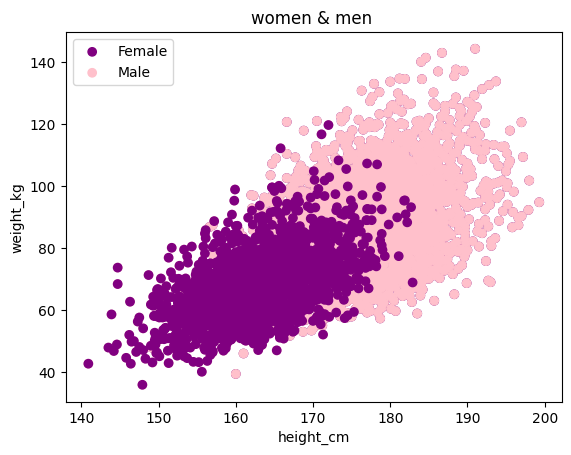

In [46]:
cmap =["pink","purple"]
plt.scatter(data["stature"],data["weightkg"], c=data["Gender"]==1 ,cmap=ListedColormap(cmap),label="Female")
plt.scatter(data["stature"],data["weightkg"], c=data["Gender"]==0 ,cmap=ListedColormap(cmap),label="Male")

plt.legend(["men","women"])
plt.title("women & men ")
plt.xlabel("height_cm")
plt.ylabel("weight_kg")
plt.legend()
plt.show()

In [42]:
data['weightkg'] = data['weightkg'] / 10
data['stature'] = data['stature'] / 10 

data['Gender'] = data['Gender'].replace(['Female','Male'], [0,1])
data['stature']
print("👨Mean of Men height is:", round((male_data['stature'] / 10).to_numpy().mean(),2), "cm")
print("👩Mean of Women height is:", round((female_data['stature'] / 10).to_numpy().mean(),2), "cm")

👨Mean of Men height is: 175.62 cm
👩Mean of Women height is: 162.85 cm


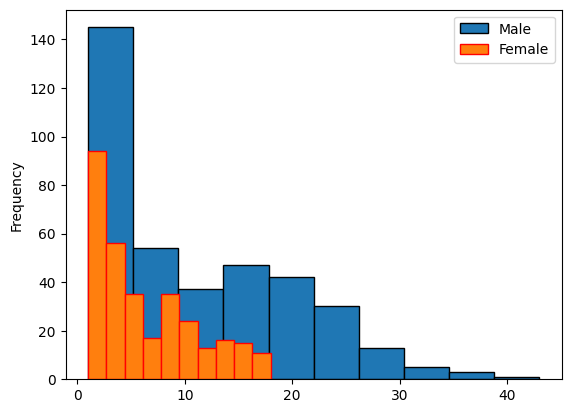

In [43]:
male_data['stature'] = male_data['stature'] /10 
female_data['stature'] = female_data['stature'] /10 

male_data['stature'].value_counts().plot(kind='hist', edgecolor='black', label= "Male")
female_data['stature'].value_counts().plot(kind='hist', edgecolor='red', label = "Female")
plt.legend()
plt.show()

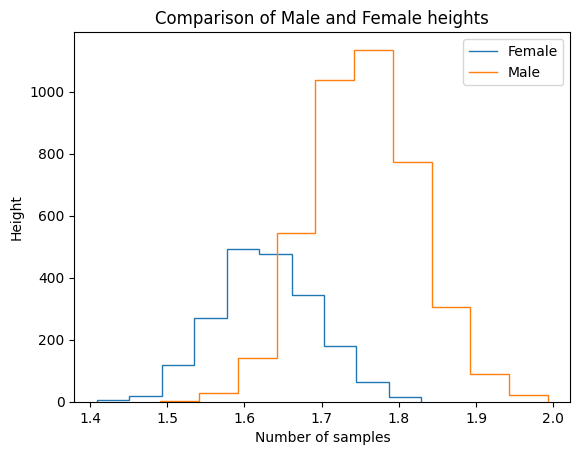

In [24]:

counts, bins = np.histogram(female_data['stature'])
plt.stairs(counts, bins, label = "Female")
counts_1, bins_1 = np.histogram(male_data['stature'])
plt.stairs(counts_1, bins_1, label = "Male")
plt.title('Comparison of Male and Female heights')
plt.xlabel('Number of samples')
plt.ylabel('Height')
plt.legend()
plt.show()

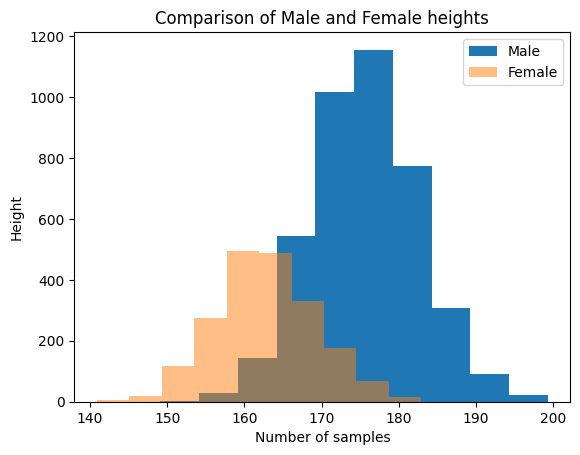

In [22]:
counts_1, bins_1 = np.histogram(male_data['stature'])
plt.hist(bins_1[:-1], bins_1, weights=counts_1, label = "Male")
counts, bins = np.histogram(female_data['stature'])
plt.hist(bins[:-1], bins, weights=counts, label = "Female", alpha = 0.5)

plt.title('Comparison of Male and Female heights')
plt.xlabel('Number of samples')
plt.ylabel('Height')
plt.legend()
plt.show()

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
def generate_dataset():
    width = data['weightkg']
    height = data['stature']
    X = np.array([width,height]).T
    Y = data['Gender']
    Y = np.array(Y)
    return X,Y

In [200]:
X,Y = generate_dataset()
X,Y

(array([[ 81.5, 177.6],
        [ 72.6, 170.2],
        [ 92.9, 173.5],
        ...,
        [ 76.2, 164.4],
        [ 63.2, 161.6],
        [ 61. , 164.1]]),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int64))

In [201]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=4)
len(x_test)


1214

In [202]:
x_test, y_test

(array([[ 90. , 179. ],
        [ 88. , 177.7],
        [ 64.5, 163.7],
        ...,
        [ 91.3, 171.8],
        [ 95.1, 181.8],
        [ 70.2, 165.9]]),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

In [203]:
knn = KNN(k=7)
knn.fit(x_train , y_train)
sample1 = np.array([85,  164.9])
sample2 = np.array([70.5 , 185.1])
sample3 = np.array([52.3  , 169])
sample4 = np.array([80.4 , 190.5])
sample5 = np.array([70 , 170])
samples = [sample1, sample2, sample3, sample4, sample5]
outputs = knn.predict(samples)
print(outputs)
for output in outputs: 
    if output == 0 : 
        print('Female👩')
    else:
        print('Male👨')

[1, 1, 1, 1, 0]
Male👨
Male👨
Male👨
Male👨
Female👩


In [204]:
knn.evaluate(x_test , y_test)

0.8542009884678748

In [205]:
#Confusion Matrix

In [209]:
y_pred = knn.predict(x_test)
def cm(y_pred, y_test):
    confusion_matrix = np.zeros((2,2))
    for i in range (len(x_test)):
        if y_pred[i] == 0 and  y_test[i] == 0:
            confusion_matrix[0][0] += 1 
        if y_pred[i] == 0 and y_test[i] == 1 :
            confusion_matrix[0][1] += 1
        if y_pred[i] == 1 and y_test[i] == 0 :
            confusion_matrix[1][0] += 1 
        if y_pred[i] == 1 and y_test[i] == 1 :
            confusion_matrix[1][1] += 1
    return(confusion_matrix)
        
confusion_matrix = cm(y_pred, y_test)
confusion_matrix

array([[294.,  82.],
       [ 96., 742.]])

In [207]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7 )
knn.fit(x_train , y_train)
knn.score(x_test, y_test)

0.8533772652388797

In [221]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

In [222]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[294,  96],
       [ 82, 742]], dtype=int64)

In [223]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [226]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred) 

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True]) 

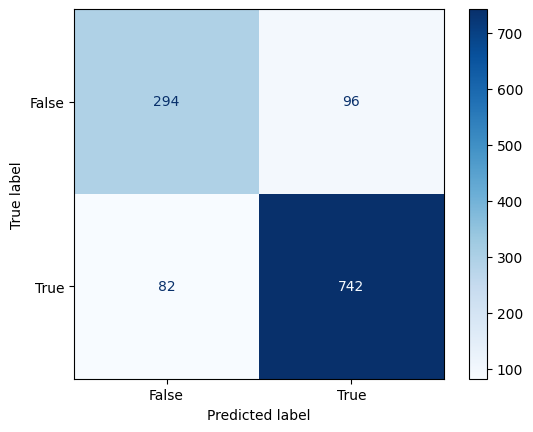

In [228]:
cm_display.plot(cmap=plt.cm.Blues)
plt.show() 